# Empirical cumulative distribution functions

## 1. Computing the ECDF
In this exercise, you will write a function that takes as input a 1D array of data and then returns the `x` and `y` values of the ECDF. You will use this function over and over again throughout this course and its sequel. ECDFs are among the most important plots in statistical analysis. You can write your own function, `foo(x,y)` according to the following skeleton:
```
def foo(a,b):
    """State what function does here"""
    # Computation performed here
    return x, y
```
The function `foo()` above takes two arguments `a` and `b` and returns two values `x` and `y`. The function header `def foo(a,b)`: contains the function signature `foo(a,b)`, which consists of the function name, along with its parameters.

### Instructions:
* Define a function with the signature `ecdf(data)`. Within the function definition,
    * Compute the number of data points, `n`, using the `len()` function.
    * The $x$-values are the sorted data. Use the `np.sort()` function to perform the sorting.
    * The $y$ data of the ECDF go from `1/n` to `1` in equally spaced increments. You can construct this using `np.arange()`. Remember, however, that the end value in `np.arange()` is not inclusive. Therefore, `np.arange()` will need to go from `1` to `n+1`. Be sure to divide this by `n`.
    * The function returns the values `x` and `y`.

In [1]:
# Import pandas
import pandas as pd
# Import plotting modules
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
# Set default Seaborn style
sns.set()
# Import numpy
import numpy as np

In [2]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

## 2. Plotting the ECDF:
You will now use your `ecdf()` function to compute the ECDF for the petal lengths of Anderson's _Iris versicolor flowers_. You will then plot the ECDF. Recall that your `ecdf()` function returns two arrays so you will need to unpack them. An example of such unpacking is `x, y = foo(data)`, for some function `foo()`.

### Instructions:
* Use `ecdf()` to compute the ECDF of `versicolor_petal_length`. Unpack the output into `x_vers` and `y_vers`.
* Plot the ECDF as dots. Remember to include `marker = '.'` and `linestyle = 'none'` in addition to `x_vers` and `y_vers` as arguments inside `plt.plot()`.
* Label the axes. You can label the y-axis `'ECDF'`.
* Show your plot.

In [3]:
# Load iris file
iris = pd.read_csv('13_Statistical_Thinking_1/_datasets/iris.csv')
# Print unique values in species column
print(iris.species.unique())

# Filter all rows with versicolor in species column
versicolor = iris.loc[iris['species']=='versicolor']
# Select petal length column
versicolor_petal_length = versicolor.iloc[:,2]

# Filter all rows with setosa in species column
setosa = iris.loc[iris['species']=='setosa']
# Select petal length column
setosa_petal_length = setosa.iloc[:,2]

# Filter all rows with virginica in species column
virginica = iris.loc[iris['species']=='virginica']
# Select petal length column
virginica_petal_length = virginica.iloc[:,2]

['setosa' 'versicolor' 'virginica']


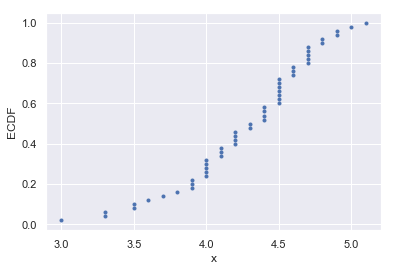

In [4]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(versicolor_petal_length)

# Generate plot
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')

# Label the axes
_ = plt.ylabel('ECDF')
_ = plt.xlabel('x')

# Display the plot
plt.show()

## 3. Comparison of ECDFs:
ECDFs also allow you to compare two or more distributions (though plots get cluttered if you have too many). Here, you will plot ECDFs for the petal lengths of all three iris species. You already wrote a function to generate ECDFs so you can put it to good use!

To overlay all three ECDFs on the same plot, you can use `plt.plot()` three times, once for each ECDF. Remember to include `marker='.'` and `linestyle='none'` as arguments inside `plt.plot()`.

### Instructions:
* Compute ECDFs for each of the three species using your `ecdf()` function. The variables `setosa_petal_length`, `versicolor_petal_length`, and `virginica_petal_length` are all in your namespace. Unpack the ECDFs into `x_set`, `y_set`, `x_vers`, `y_vers` and `x_virg`, `y_virg`, respectively.
* Plot all three ECDFs on the same plot as dots. To do this, you will need three `plt.plot()` commands. Assign the result of each to `_`.
* A legend and axis labels have been added for you, so hit 'Submit Answer' to see all the ECDFs!

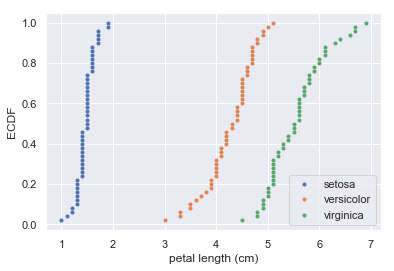

In [5]:
# Compute ECDFs
x_set, y_set = ecdf(setosa_petal_length)
x_vers, y_vers = ecdf(versicolor_petal_length)
x_virg, y_virg = ecdf(virginica_petal_length)

# Plot all ECDFs on the same plot
_ = plt.plot(x_set, y_set, marker='.', linestyle='none')
_ = plt.plot(x_vers, y_vers, marker='.', linestyle='none')
_ = plt.plot(x_virg, y_virg, marker='.', linestyle='none')

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

The ECDFs expose clear differences among the species. Setosa is much shorter, also with less absolute variability in petal length than versicolor and virginica.